In [490]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [491]:
df = pd.read_csv('UK_international-visits.csv')
print(df.shape)
df.head()

(549853, 11)


/var/folders/d3/ry6v0r7j28d4wdqwrz_hvdqc0000gn/T/ipykernel_55403/1959004591.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UK_international-visits.csv')


,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [492]:
df['area'].unique()
#convert to array of strings
regions = df['area'].astype(str).unique()
print(regions)


['TOTAL ENGLAND' 'LONDON' 'REST OF ENGLAND' 'SOUTHERN ENGLAND'
 'SOUTH EAST' 'SCOTLAND' 'ALL STAYING VISITS' "ENGLAND'S NORTH COUNTRY"
 'CENTRAL ENGLAND' 'NORTH EAST' 'NORTH WEST' 'WEST MIDLANDS'
 'EAST MIDLANDS' 'EAST OF ENGLAND' 'SOUTH WEST' 'YORKSHIRE' 'WALES'
 ' NORTHERN IRELAND' ' OIL RIGS/TRAVELLING' ' ISLE OF MAN'
 ' CHANNEL ISLANDS']


In [493]:
regions = ['North', 'Midlands', 'East', 'South', 'London']
london = ['LONDON']
south = ['SOUTH WEST', 'SOUTH EAST', 'SOUTHERN ENGLAND', ' CHANNEL ISLANDS',  ' ISLE OF MAN']
east = ['EAST OF ENGLAND', 'REST OF ENGLAND']
midlands = ['WEST MIDLANDS', 'EAST MIDLANDS', 'CENTRAL ENGLAND', 'YORKSHIRE']
north = ['NORTH EAST', 'NORTH WEST', ' NORTHERN IRELAND', 'SCOTLAND', 'WALES', "ENGLAND'S NORTH COUNTRY"]
#map regions to areas
df['area'] = df['area'].replace(london, 'London')
df['area'] = df['area'].replace(south, 'South')
df['area'] = df['area'].replace(east, 'East')
df['area'] = df['area'].replace(midlands, 'Midlands')
df['area'] = df['area'].replace(north, 'North')

df['area'].unique()
#drop 'ALL STAYING VISITS' and 'OIL RIGS/TRAVELLING' and 'TOTAL ENGLAND'
df = df[df.area != 'ALL STAYING VISITS']
df = df[df.area != ' OIL RIGS/TRAVELLING']
df = df[df.area != 'TOTAL ENGLAND']
df['area'].unique()

array(['London', 'East', 'South', 'North', 'Midlands'], dtype=object)

In [494]:
df.shape

(398054, 11)

In [495]:
# combine the yeae and quarter columns
quarters = df['quarter'].unique().astype(str)
#map quarters to numbers [0,0.25,0.5,0.75]
mapping = {quarters[0]:0, quarters[1]:0.25, quarters[2]:0.5, quarters[3]:0.75}
df['quarter'] = df['quarter'].replace(mapping)

In [496]:
df['quarter'].unique()

array([0.  , 0.25, 0.5 , 0.75])

In [497]:
#combine year and quarter columns by adding them together, casting them as floats
#map '2019P' to 2019
df['year'] = df['year'].replace('2019P', 2019)
df['year'] = df['year'].astype(float)
df['quarter'] = df['quarter'].astype(float)
df['time'] = df['year'] + df['quarter']

In [498]:
df['time'].unique()

array([2002.  , 2002.25, 2002.5 , 2002.75, 2003.  , 2003.25, 2003.5 ,
       2003.75, 2004.  , 2004.25, 2004.5 , 2004.75, 2005.  , 2005.25,
       2005.5 , 2005.75, 2006.  , 2006.25, 2006.5 , 2006.75, 2007.  ,
       2007.25, 2007.5 , 2007.75, 2008.  , 2008.25, 2008.5 , 2008.75,
       2009.  , 2009.25, 2009.5 , 2009.75, 2010.  , 2010.25, 2010.5 ,
       2010.75, 2011.  , 2011.25, 2011.5 , 2011.75, 2012.  , 2012.25,
       2012.5 , 2012.75, 2013.  , 2013.25, 2013.5 , 2013.75, 2014.  ,
       2014.25, 2014.5 , 2014.75, 2015.  , 2015.25, 2015.5 , 2015.75,
       2016.  , 2016.25, 2016.5 , 2016.75, 2017.  , 2017.25, 2017.5 ,
       2017.75, 2018.  , 2018.25, 2018.5 , 2018.75, 2019.  , 2019.25,
       2019.5 ])

In [499]:
#filter to only tourist visits
df['purpose'].unique()
df = df[df.purpose == 'Holiday']


In [500]:
#drop quarter and mode
df = df.drop(['year','quarter', 'mode', 'purpose'], axis=1)


In [501]:

EU = df['market'].unique()[:24]
EU2 = df['market'].unique()[54:57]
Americas = df['market'].unique()[24:30]
Asia = df['market'].unique()[30:49]
Asia2 = df['market'].unique()[58:62]
Africa = df['market'].unique()[49:54]

df['market'].unique()
#concat EU and EU2
EU = np.concatenate((EU, EU2), axis=None)
#concat Asia and Asia2
Asia = np.concatenate((Asia, Asia2), axis=None)
#add chile to Americas
Americas = np.append(Americas, 'Chile')
print(EU, Americas, Asia, Africa)

['Belgium' 'Luxembourg' 'France' 'Germany' 'Italy' 'Netherlands' 'Denmark'
 'Greece' 'Spain' 'Portugal' 'Austria' 'Sweden' 'Finland' 'Irish Republic'
 'Turkey' 'Switzerland' 'Norway' 'Iceland' 'Czech Republic' 'Poland'
 'Hungary' 'Russia' 'Other Western Europe' 'Other Eastern Europe'
 'Bulgaria' 'Romania' 'Serbia'] ['USA' 'Canada' 'Mexico' 'Brazil' 'Argentina'
 'Other Central & South America' 'Chile'] ['Hong Kong' 'Malaysia' 'Thailand' 'Singapore' 'Taiwan' 'China'
 'Other Asia' 'Japan' 'South Korea' 'Australia' 'New Zealand'
 'United Arab Emirates' 'Saudi Arabia' 'Kuwait' 'Other Middle East'
 'Egypt' 'Israel' 'India' 'Pakistan' 'Indonesia' 'Bahrain' 'Oman' 'Qatar'] ['South Africa' 'Other Southern Africa' 'Nigeria' 'Kenya' 'Other Africa']


In [502]:
#make markets mappping
mapping = {}
for i in EU:
    mapping[i] = 'EU'
for i in Americas:
    mapping[i] = 'Americas'
for i in Asia:
    mapping[i] = 'Asia'
for i in Africa:
    mapping[i] = 'Africa'

df['market'] = df['market'].replace(mapping)
df['market'].unique()

array(['EU', 'Americas', 'Asia', 'Africa'], dtype=object)

In [503]:
#make market categorical
df['market'] = df['market'].astype('category')
df['market'].unique()
df.head()

,market,dur_stay,area,visits,spend,nights,sample,time
1,EU,1-3 nights,London,3.572186,0.969138,6.954456,5,2002.0
2,EU,1-3 nights,East,0.859430,0.044346,2.575960,1,2002.0
3,EU,1-3 nights,South,0.859430,0.044346,2.575960,1,2002.0
4,EU,1-3 nights,South,0.859430,0.044346,2.575960,1,2002.0
5,EU,1-3 nights,North,0.719947,0.244438,1.439890,1,2002.0


In [504]:
#dur_stay
df['dur_stay'].unique()

array(['1-3 nights', '4-7 nights', '8-14 nights', '15+ nights',
       'Not Known'], dtype=object)

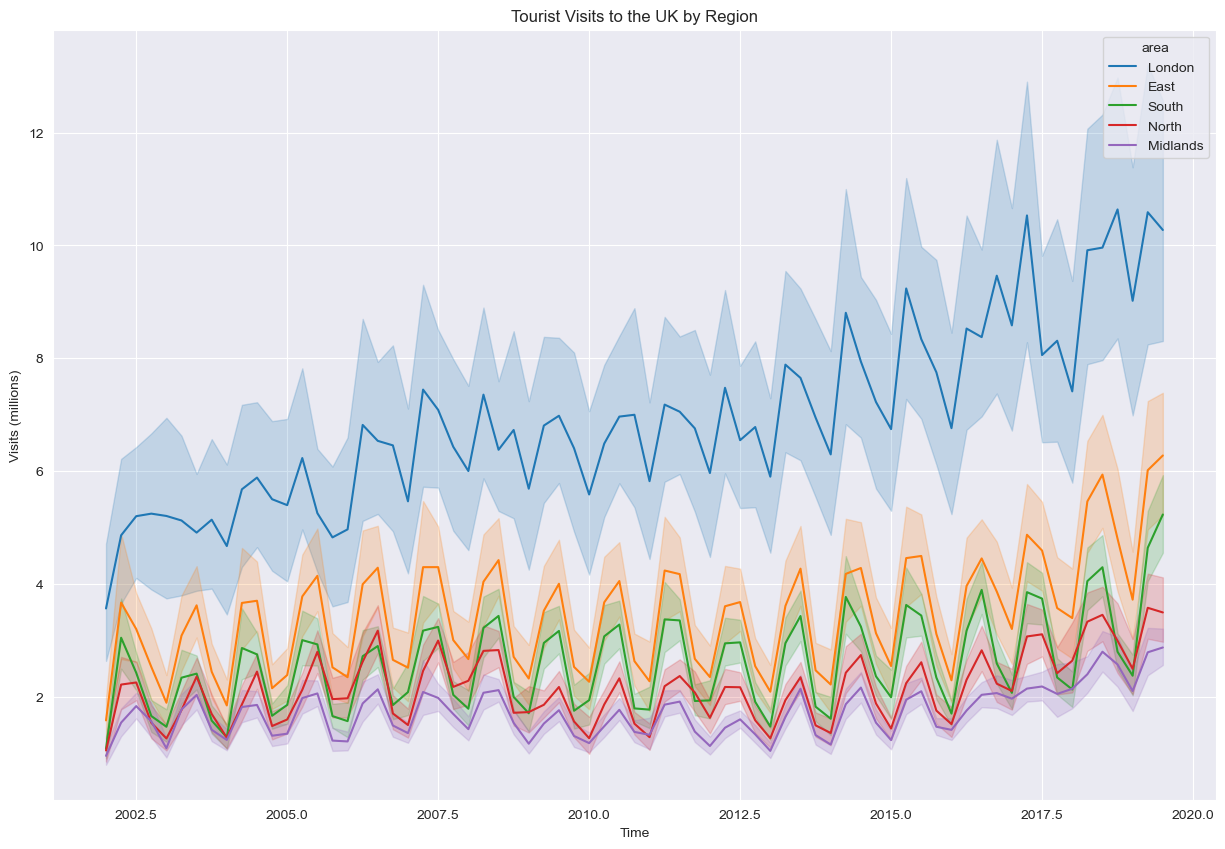

In [505]:
# plot tourist visits over time
plt.figure(figsize=(15,10))
sns.lineplot(x='time', y='visits', hue='area', data=df)
plt.title('Tourist Visits to the UK by Region')
plt.xlabel('Time')
plt.ylabel('Visits (millions)')
plt.show()

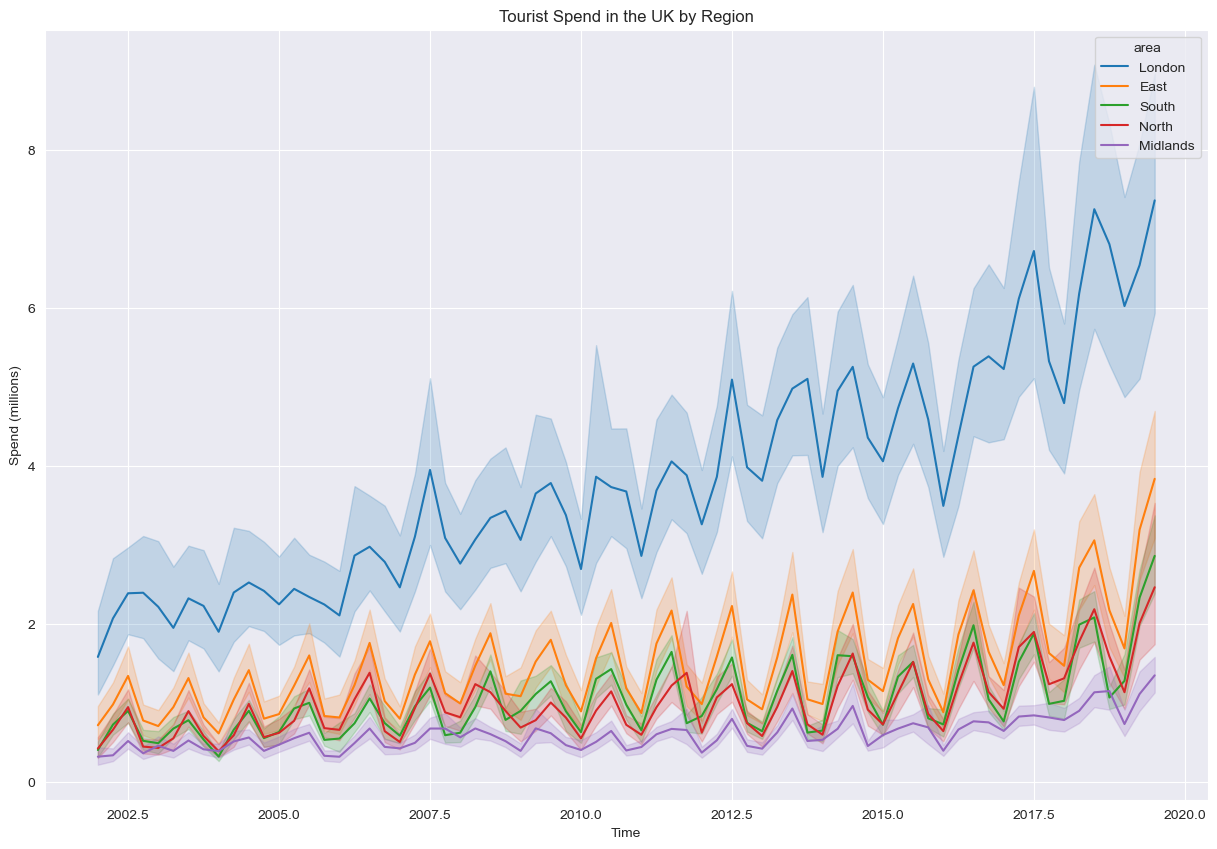

In [506]:
# plot tourist spend over time
plt.figure(figsize=(15,10))
sns.lineplot(x='time', y='spend', hue='area', data=df)
plt.title('Tourist Spend in the UK by Region')
plt.xlabel('Time')
plt.ylabel('Spend (millions)')
plt.show()

# Using features to conduct synthetic control

In [507]:
#import cultural data
df_art = pd.read_csv('museum-art/Arts-Table 1.csv', delimiter=';')
df_museum = pd.read_csv('museum-art/Museum or Gallery-Table 1.csv', delimiter=';')
df_art

,Area,2008-09,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,North East,"39,5","52,7","53,9","61,3","59,5","59,1","57,4","59,4","60,2","60,4","58,4"
1,North West,"42,8","59,0","59,7","59,9","59,4","62,0","59,7","57,4","58,2","58,4","57,4"
2,Yorkshire,"40,4","56,8","59,5","61,5","58,7","59,3","55,","57,4","56,2","58,4","57,4"
3,East Midlands,"43,6","59,4","61,3","64,0","60,2","63,0","59,9","59,4","60,2","60,4","58,4"
4,West Midlands,"41,5","58,1","61,3","61,5","59,5","55,4","57,3","59,7","56,6","58,4","60,4"
5,East,"47,3","63,9","67,6","69,0","69,3","62,7","60,3","61,4","58,4","59,6","60,1"
6,London,"49,5","60,7","63,0","62,1","62,0","56,7","61,6","62,4","64,2","65,4","66,4"
7,South East,"50,4","67,9","68,2","68,5","65,9","68,6","64,1","65,4","66,2","64,4","67,4"
8,South West,"47,9","64,7","68,0","67,1","68,0","65,1","69,4","68,4","67,2","67,4","69,4"
9,England,"45,5","61,2","63,3","64,1","62,8","61,6","61,2","59,4","60,2","60,4","58,4"


In [508]:
#map ['Yorkshire', 'East Midlands', 'West Midlands'] to 'Midlands'
df_art['Region'] = df_art['Area'].replace(['Yorkshire', 'East Midlands', 'West Midlands'], 'Midlands')
df_museum['Region'] = df_museum['Area'].replace(['Yorkshire', 'East Midlands', 'West Midlands'], 'Midlands')

#map ['North East', 'North West'] to 'North'
df_art['Region'] = df_art['Region'].replace(['North East', 'North West'], 'North')
df_museum['Region'] = df_museum['Region'].replace(['North East', 'North West'], 'North')

#map ['South East', 'South West'] to 'South'
df_art['Region'] = df_art['Region'].replace(['South East', 'South West'], 'South')
df_museum['Region'] = df_museum['Region'].replace(['South East', 'South West'], 'South')

df_art['Region'].unique()
#drop 'England'
df_art = df_art[df_art.Region != 'England']
df_museum = df_museum[df_museum.Region != 'England']
#drop area
df_art = df_art.drop(['Area'], axis=1)
df_museum = df_museum.drop(['Area'], axis=1)


In [509]:
df_museum = df_museum.drop(['Code'], axis=1)

In [510]:
#replace , with . and cast as float
#convert all rows to floats
df_art_col_names = df_art.columns[:-1]
df_museum_col_names = df_museum.columns[:-1]

df_art[df_art_col_names] = df_art[df_art_col_names].replace(',','.', regex=True)
df_museum[df_museum_col_names] = df_museum[df_museum_col_names].replace(',','.', regex=True)

df_art[df_art_col_names] = df_art[df_art_col_names].astype(float)
df_museum[df_museum_col_names] = df_museum[df_museum_col_names].astype(float)



In [511]:
df_museum

,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,51.7,48.5,51.1,53.7,53.7,53.4,51.7,53.7,53.7,53.4,51.7,North
1,53.2,50.0,49.6,52.5,53.6,55.3,54.9,52.5,53.6,55.3,54.9,North
2,50.7,45.3,47.2,55.3,53.0,49.0,48.0,55.3,53.0,49.0,48.0,Midlands
3,48.9,41.8,45.0,52.2,51.9,50.6,49.0,52.2,51.9,50.6,49.0,Midlands
4,48.2,41.4,47.7,49.2,46.3,45.5,45.5,49.2,46.3,45.5,45.5,Midlands
5,52.6,46.1,51.0,52.4,54.7,49.5,51.9,52.4,54.7,49.5,51.9,East
6,59.8,54.8,57.1,58.9,62.1,57.1,62.8,63.9,62.1,61.1,62.8,London
7,55.9,50.6,50.3,56.9,56.1,58.9,56.2,56.9,56.1,58.9,56.2,South
8,52.1,43.1,46.4,52.8,51.6,51.0,52.7,52.8,51.6,51.0,52.7,South


In [512]:
#combine rows with same region by averaging
df_art = df_art.groupby(['Region']).mean()
df_museum = df_museum.groupby(['Region']).mean()
df_art

,2008-09,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
Region,,,,,,,,,,,
East,47.300000,63.90,67.6,69.000000,69.300000,62.700000,60.30,61.400000,58.400000,59.600000,60.100000
London,49.500000,60.70,63.0,62.100000,62.000000,56.700000,61.60,62.400000,64.200000,65.400000,66.400000
Midlands,41.833333,58.10,60.7,62.333333,59.466667,59.233333,57.40,58.833333,57.666667,59.066667,58.733333
North,41.150000,55.85,56.8,60.600000,59.450000,60.550000,58.55,58.400000,59.200000,59.400000,57.900000
South,49.150000,66.30,68.1,67.800000,66.950000,66.850000,66.75,66.900000,66.700000,65.900000,68.400000


In [513]:
years = ['2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

years_mapping = {}
for i in range(len(years)):
    years_mapping[years[i]] = int(years[i][:4])


df_art = df_art.rename(years_mapping, axis=1)
df_museum = df_museum.rename(years_mapping, axis=1)

In [514]:
df_art

,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,
East,47.300000,63.90,67.6,69.000000,69.300000,62.700000,60.30,61.400000,58.400000,59.600000,60.100000
London,49.500000,60.70,63.0,62.100000,62.000000,56.700000,61.60,62.400000,64.200000,65.400000,66.400000
Midlands,41.833333,58.10,60.7,62.333333,59.466667,59.233333,57.40,58.833333,57.666667,59.066667,58.733333
North,41.150000,55.85,56.8,60.600000,59.450000,60.550000,58.55,58.400000,59.200000,59.400000,57.900000
South,49.150000,66.30,68.1,67.800000,66.950000,66.850000,66.75,66.900000,66.700000,65.900000,68.400000


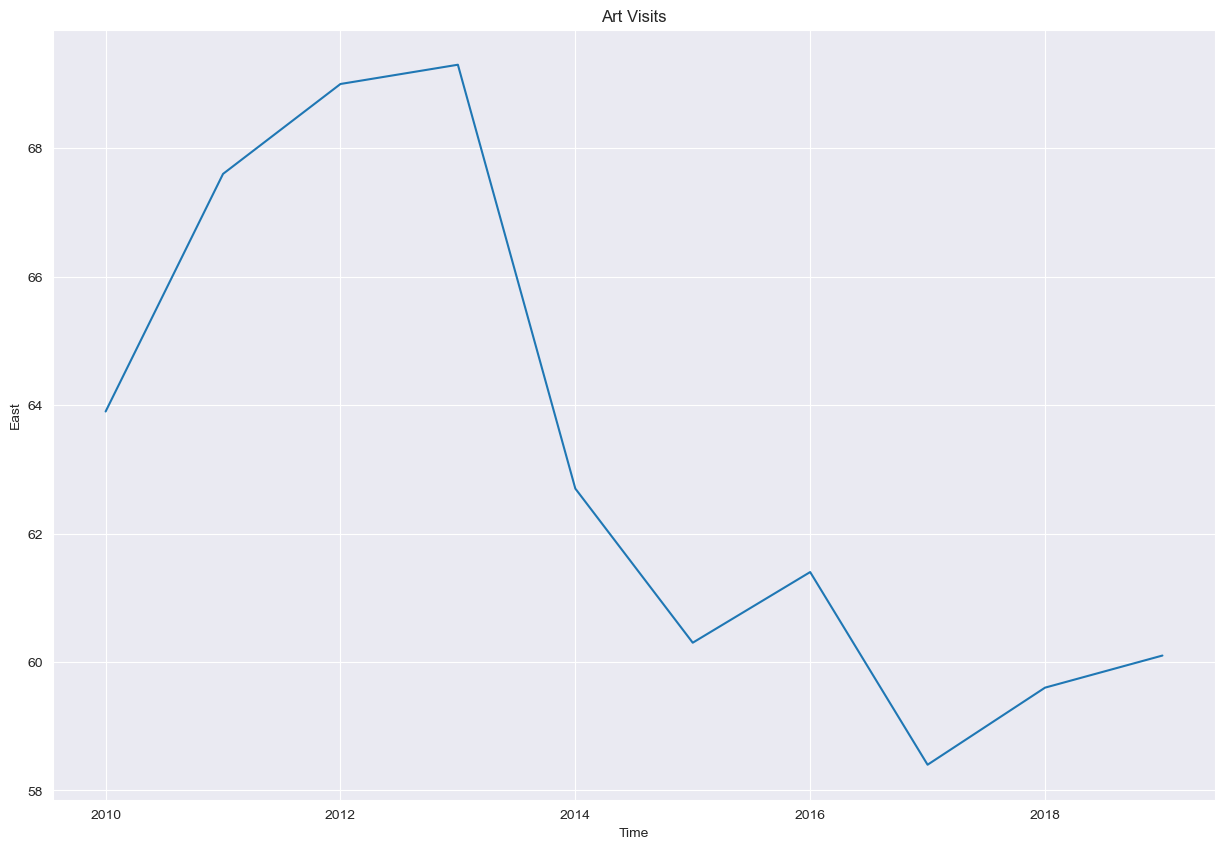

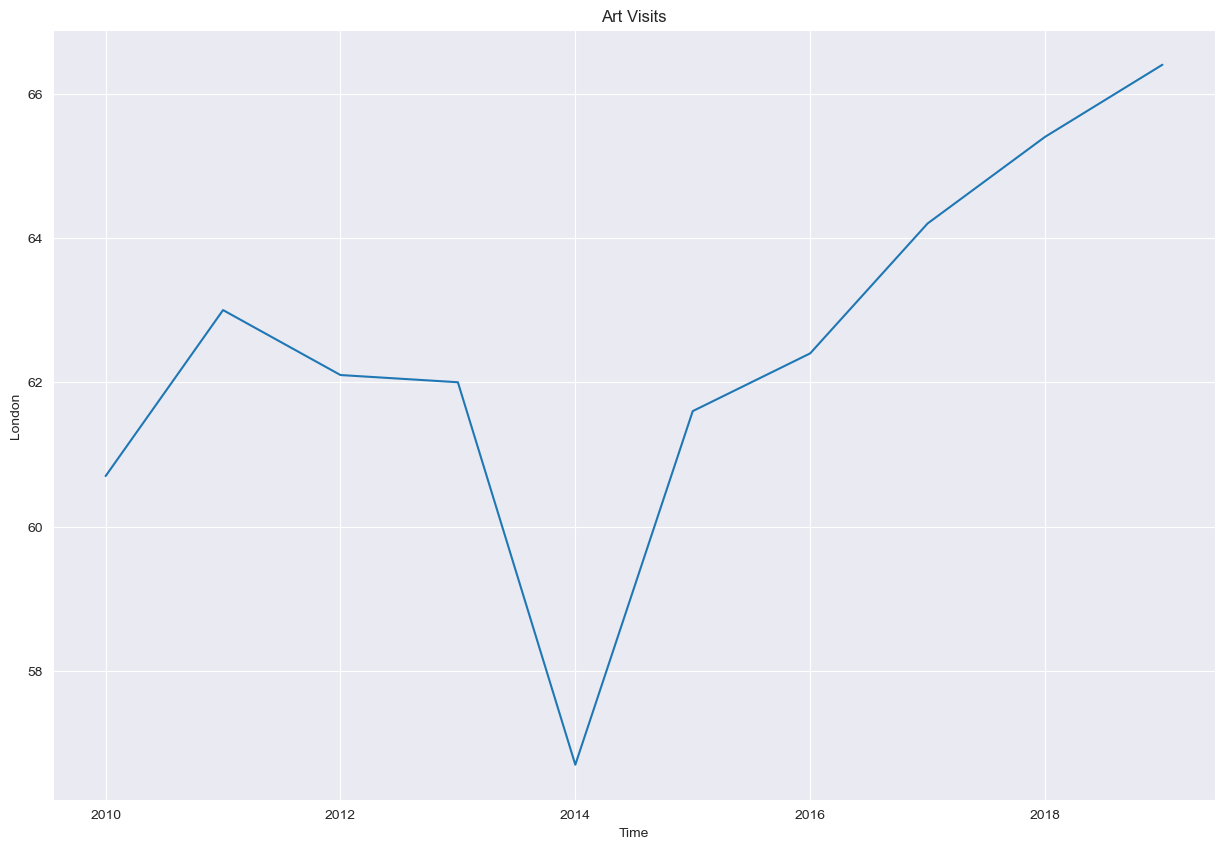

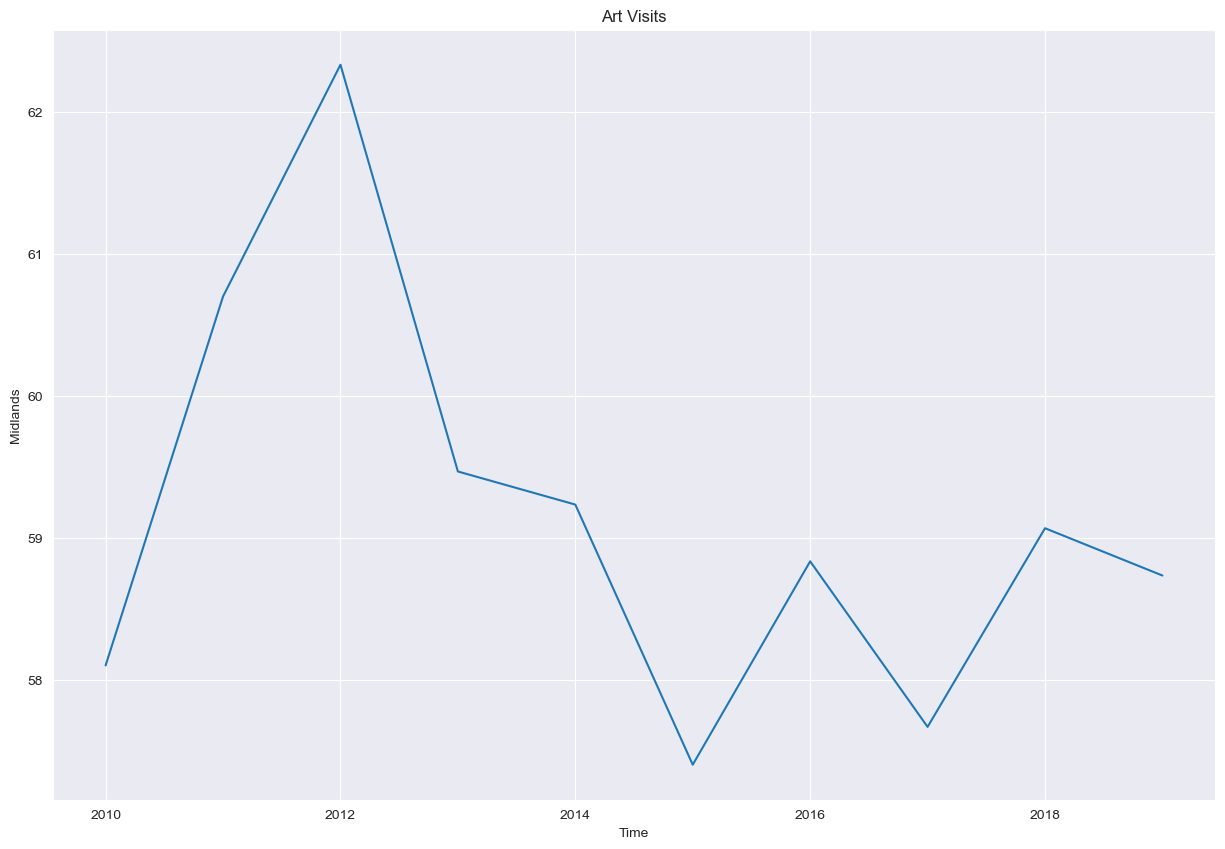

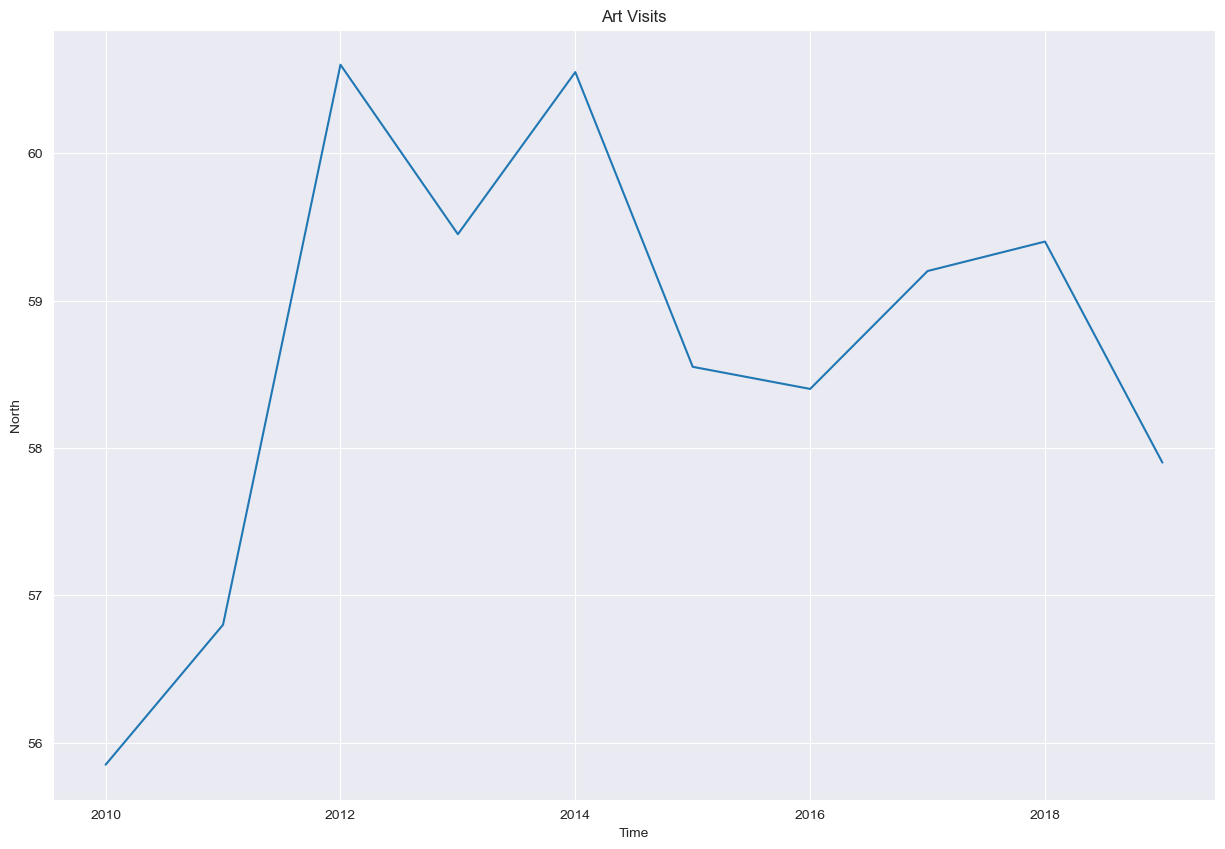

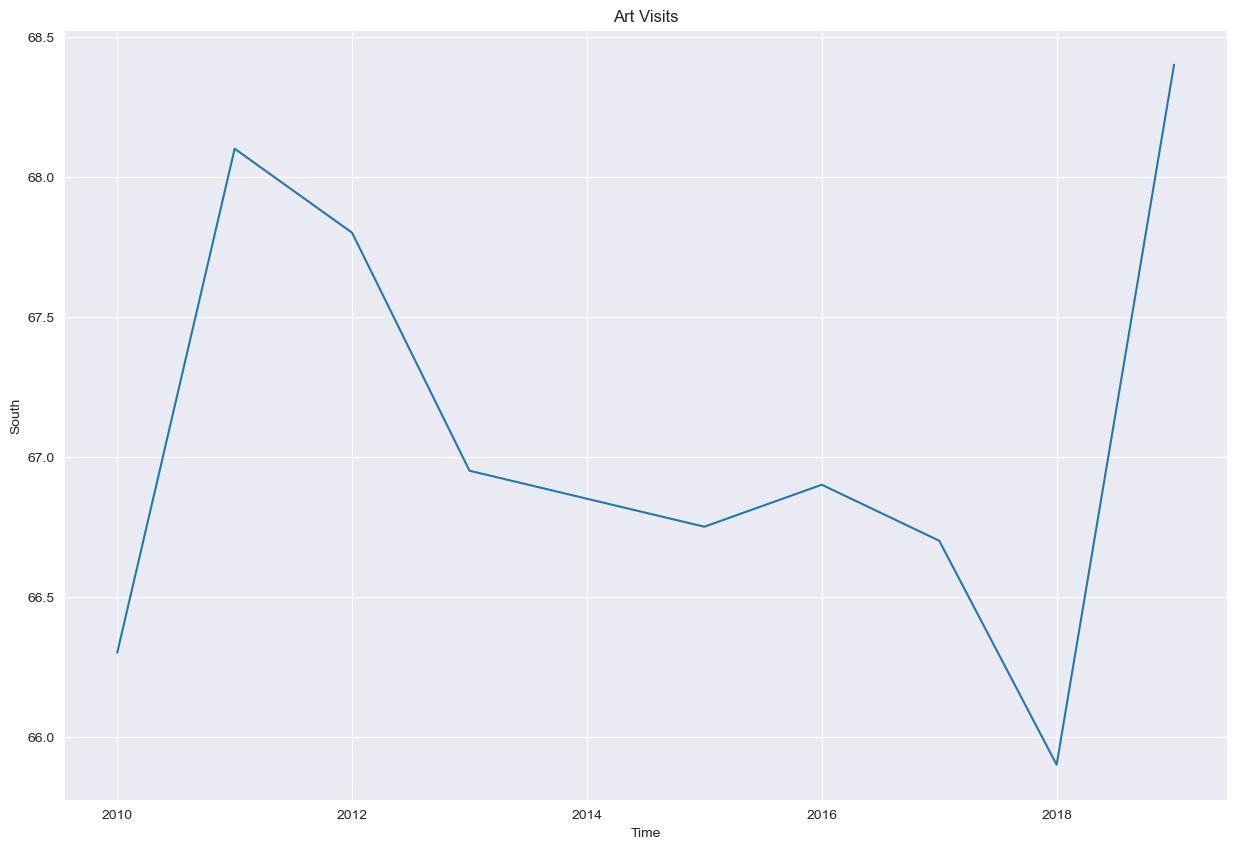

In [515]:
#graph each region
#year is every column except the first
years = df_art.columns[1:]
# plot the values of each region over time
for i in range(len(df_art)):
    plt.figure(figsize=(15,10))
    sns.lineplot(x=years, y=df_art.iloc[i][1:])
    plt.title('Art Visits')
    plt.xlabel('Time')
    plt.show()



In [516]:
#s-um each region for original df (group by region and time)
df_grouped = df.groupby(['area', 'time']).sum()


In [517]:
df_grouped

visits        spend        nights  sample
area  time                                                   
East  2002.00   323.884034   146.288664   2965.884362     641
      2002.25   935.289165   249.040989   5982.539642    1177
      2002.50  1110.090069   464.501529  10729.851217    1619
      2002.75   530.966521   162.451365   4294.629454     797
      2003.00   401.321951   149.068811   2835.767911     638
...                    ...          ...           ...     ...
South 2018.50  1868.330396   904.557135  11365.800474    1429
      2018.75   908.947899   346.029100   4167.192875     775
      2019.00   585.866556   315.167959   3241.830936     473
      2019.25  1605.398631   806.231036   8403.921716    1054
      2019.50  2316.819907  1266.724400  16478.494794    1504

[355 rows x 4 columns]

In [518]:
#convert all column names into a column in df_art and df_museum
df_art = df_art.reset_index()
df_museum = df_museum.reset_index()

df_art = df_art.melt(id_vars=['Region'], var_name='time', value_name='art_visits')
df_museum = df_museum.melt(id_vars=['Region'], var_name='time', value_name='museum_visits')



In [519]:
df_art

,Region,time,art_visits
0,East,2008,47.300000
1,London,2008,49.500000
2,Midlands,2008,41.833333
3,North,2008,41.150000
4,South,2008,49.150000
5,East,2010,63.900000
6,London,2010,60.700000
7,Midlands,2010,58.100000
8,North,2010,55.850000
9,South,2010,66.300000


In [520]:
df_museum

,Region,time,museum_visits
0,East,2008,52.600000
1,London,2008,59.800000
2,Midlands,2008,49.266667
3,North,2008,52.450000
4,South,2008,54.000000
5,East,2010,46.100000
6,London,2010,54.800000
7,Midlands,2010,42.833333
8,North,2010,49.250000
9,South,2010,46.850000


In [521]:
#for each row, duplicate row 4 times, adding 0.25, 0.5, 0.75 to time column for the 3 new rows respectively
df_art = df_art.reindex(df_art.index.repeat(4)).reset_index(drop=True)
df_museum = df_museum.reindex(df_museum.index.repeat(4)).reset_index(drop=True)

df_art['time'] = df_art['time'].astype(float)
df_museum['time'] = df_museum['time'].astype(float)

df_art['time'] = df_art['time']
df_museum['time'] = df_museum['time']

df_art.loc[::4, 'time'] = df_art.loc[::4, 'time'] + 0.25
df_museum.loc[::4, 'time'] = df_museum.loc[::4, 'time'] + 0.25

df_art.loc[1::4, 'time'] = df_art.loc[1::4, 'time'] + 0.5
df_museum.loc[1::4, 'time'] = df_museum.loc[1::4, 'time'] + 0.5

df_art.loc[2::4, 'time'] = df_art.loc[2::4, 'time'] + 0.75
df_museum.loc[2::4, 'time'] = df_museum.loc[2::4, 'time'] + 0.75

df_art





,Region,time,art_visits
0,East,2008.25,47.3
1,East,2008.50,47.3
2,East,2008.75,47.3
3,East,2008.00,47.3
4,London,2008.25,49.5
...,...,...,...
215,North,2019.00,57.9
216,South,2019.25,68.4
217,South,2019.50,68.4
218,South,2019.75,68.4


In [522]:
# copy first 20 rows to rows 20-40 and move all other rows down
#add 20 rows to start of df_art and df_museum
df_art = pd.concat([df_art.iloc[:20], df_art], ignore_index=True)
df_museum = pd.concat([df_museum.iloc[:20], df_museum], ignore_index=True)

df_art

,Region,time,art_visits
0,East,2008.25,47.3
1,East,2008.50,47.3
2,East,2008.75,47.3
3,East,2008.00,47.3
4,London,2008.25,49.5
...,...,...,...
235,North,2019.00,57.9
236,South,2019.25,68.4
237,South,2019.50,68.4
238,South,2019.75,68.4


In [523]:
#add 1 to 20:40 rows time column
df_art.loc[20:40, 'time'] = df_art.loc[20:40, 'time'] + 1
df_museum.loc[20:40, 'time'] = df_museum.loc[20:40, 'time'] + 1

df_art

,Region,time,art_visits
0,East,2008.25,47.3
1,East,2008.50,47.3
2,East,2008.75,47.3
3,East,2008.00,47.3
4,London,2008.25,49.5
...,...,...,...
235,North,2019.00,57.9
236,South,2019.25,68.4
237,South,2019.50,68.4
238,South,2019.75,68.4


In [524]:
#concaterate df_art and df_museum
df_museum_art = pd.concat([df_art, df_museum], axis=1)

In [525]:
df_museum_art

,Region,time,art_visits,Region,time,museum_visits
0,East,2008.25,47.3,East,2008.25,52.60
1,East,2008.50,47.3,East,2008.50,52.60
2,East,2008.75,47.3,East,2008.75,52.60
3,East,2008.00,47.3,East,2008.00,52.60
4,London,2008.25,49.5,London,2008.25,59.80
...,...,...,...,...,...,...
235,North,2019.00,57.9,North,2019.00,53.30
236,South,2019.25,68.4,South,2019.25,54.45
237,South,2019.50,68.4,South,2019.50,54.45
238,South,2019.75,68.4,South,2019.75,54.45


In [526]:
#drop duplicate columns
df_museum_art = df_museum_art.loc[:,~df_museum_art.columns.duplicated()]

In [527]:
df_museum_art

,Region,time,art_visits,museum_visits
0,East,2008.25,47.3,52.60
1,East,2008.50,47.3,52.60
2,East,2008.75,47.3,52.60
3,East,2008.00,47.3,52.60
4,London,2008.25,49.5,59.80
...,...,...,...,...
235,North,2019.00,57.9,53.30
236,South,2019.25,68.4,54.45
237,South,2019.50,68.4,54.45
238,South,2019.75,68.4,54.45


In [528]:
#combine with df_grouped
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'area': 'Region'})
df_grouped

,Region,time,visits,spend,nights,sample
0,East,2002.00,323.884034,146.288664,2965.884362,641
1,East,2002.25,935.289165,249.040989,5982.539642,1177
2,East,2002.50,1110.090069,464.501529,10729.851217,1619
3,East,2002.75,530.966521,162.451365,4294.629454,797
4,East,2003.00,401.321951,149.068811,2835.767911,638
...,...,...,...,...,...,...
350,South,2018.50,1868.330396,904.557135,11365.800474,1429
351,South,2018.75,908.947899,346.029100,4167.192875,775
352,South,2019.00,585.866556,315.167959,3241.830936,473
353,South,2019.25,1605.398631,806.231036,8403.921716,1054


In [529]:
df_grouped = df_grouped.merge(df_museum_art, on=['Region', 'time'])
df_grouped

,Region,time,visits,spend,nights,sample,art_visits,museum_visits
0,East,2008.00,608.072246,225.543729,4363.849629,663,47.3,52.60
1,East,2008.25,1114.502219,405.386651,6910.771150,1066,47.3,52.60
2,East,2008.50,1582.829194,672.766924,15089.683275,1423,47.3,52.60
3,East,2008.75,595.416446,244.903679,3596.535630,637,47.3,52.60
4,East,2009.00,552.674153,257.384141,3844.720725,811,47.3,52.60
...,...,...,...,...,...,...,...,...
230,South,2018.50,1868.330396,904.557135,11365.800474,1429,65.9,54.95
231,South,2018.75,908.947899,346.029100,4167.192875,775,65.9,54.95
232,South,2019.00,585.866556,315.167959,3241.830936,473,68.4,54.45
233,South,2019.25,1605.398631,806.231036,8403.921716,1054,68.4,54.45


In [530]:
#try to predict tourist visits for 2012.5 to 2019.5 using 2008.5 to 2012.5 and museum visits & art visits => synthetic control

input_features = ['time', 'art_visits', 'museum_visits']
output_features = ['visits']

#train on 2008 to 2012.5 with different regions
train_df = df_grouped[df_grouped['time'] <= 2012.5]

#test on 2012.5 to 2019.5 with different regions
test_df = df_grouped[df_grouped['time'] > 2012.5]



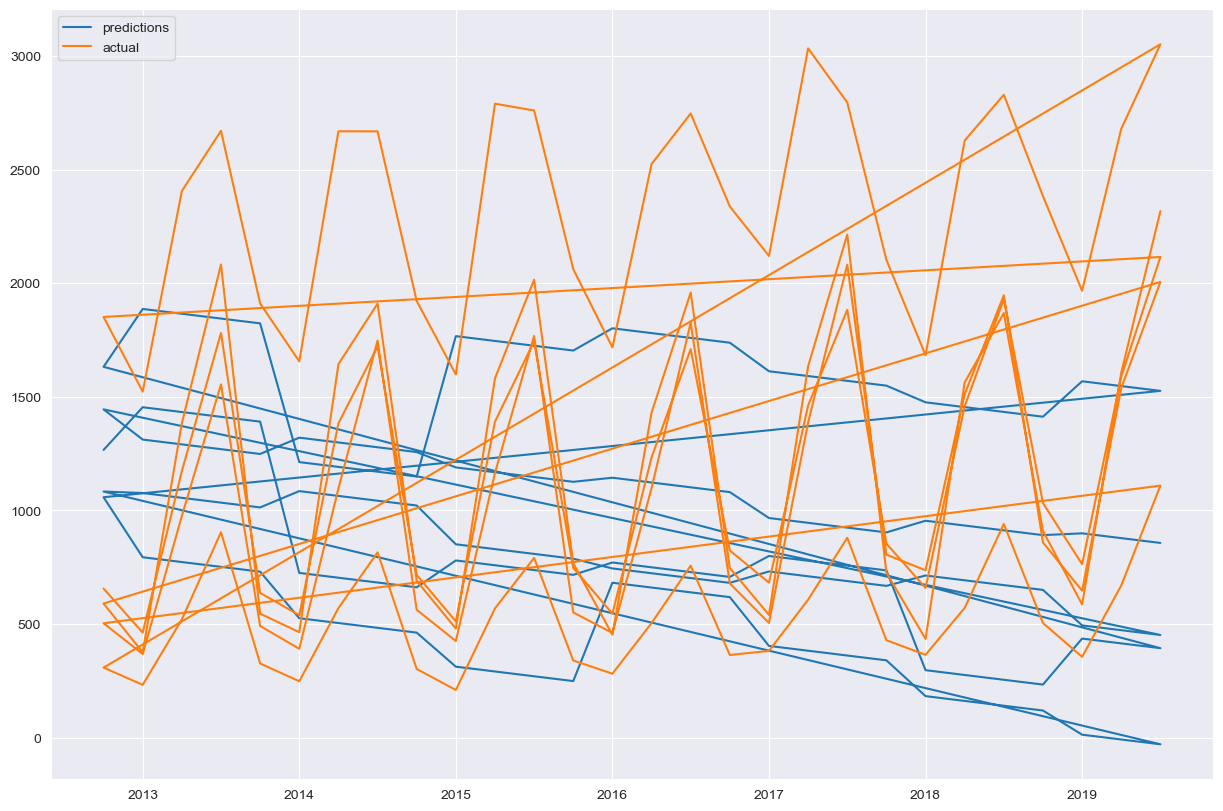

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#predict region by region
model = LinearRegression()
for region in df_grouped['Region'].unique():
    #train on 2008 to 2012.5 with different regions
    train_df = df_grouped[df_grouped['time'] <= 2012.5]
    train_df = train_df[train_df['Region'] == region]
    #test on 2012.5 to 2019.5 with different regions
    test_df = df_grouped[df_grouped['time'] > 2012.5]
    test_df = test_df[test_df['Region'] == region]

    model.fit(train_df[input_features], train_df[output_features])
    predictions = model.predict(test_df[input_features])
    #plot
    plt.figure(figsize=(15,10))
    sns.lineplot(x=test_df['time'], y=predictions.flatten())
    sns.lineplot(x=test_df['time'], y=test_df[output_features].values.flatten())
    plt.title(region)
    plt.xlabel('Time')
    plt.show()


